In [130]:
import pandas as pd
import numpy as np
import seaborn as sns
import inventorize3 as inv

In [131]:
retail = pd.read_csv("C:\\Users\\Khush Bhuta\\Desktop\\python_workspace\\data\\online_retail2.csv")

In [132]:
retail.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [133]:
retail = retail.drop_duplicates()
retail = retail.dropna()
retail = retail[retail['Quantity']>0]

In [134]:
retail_clean = retail.copy()

In [135]:
retail_clean['revenue'] = retail['Price']*retail['Quantity']

In [136]:
retail_clean.to_csv('retail_clean.csv')

In [137]:
retail_clean.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country', 'revenue'],
      dtype='object')

In [138]:
grouped = retail_clean.groupby('Description').agg(total_sales = ('Quantity',np.sum),
                                                       total_revenue = ('revenue',np.sum)).reset_index()

C:\Users\Khush Bhuta\AppData\Local\Temp\ipykernel_19808\3782141214.py:1: FutureWarning: The provided callable <function sum at 0x000002ABBB10F740> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  grouped = retail_clean.groupby('Description').agg(total_sales = ('Quantity',np.sum),
C:\Users\Khush Bhuta\AppData\Local\Temp\ipykernel_19808\3782141214.py:1: FutureWarning: The provided callable <function sum at 0x000002ABBB10F740> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  grouped = retail_clean.groupby('Description').agg(total_sales = ('Quantity',np.sum),


In [139]:
grouped.head()

,Description,total_sales,total_revenue
0,DOORMAT UNION JACK GUNS AND ROSES,167,1071.25
1,3 STRIPEY MICE FELTCRAFT,662,1241.10
2,4 PURPLE FLOCK DINNER CANDLES,324,495.16
3,50'S CHRISTMAS GIFT BAG LARGE,1885,2272.25
4,ANIMAL STICKERS,385,80.85


In [140]:
grouped.to_csv('for_abc.csv')

In [141]:
a = inv.ABC(grouped[['Description','total_sales']])

In [142]:
a.Category.value_counts()

Category
C    2881
B    1245
A    1157
Name: count, dtype: int64

<Axes: xlabel='Category', ylabel='count'>

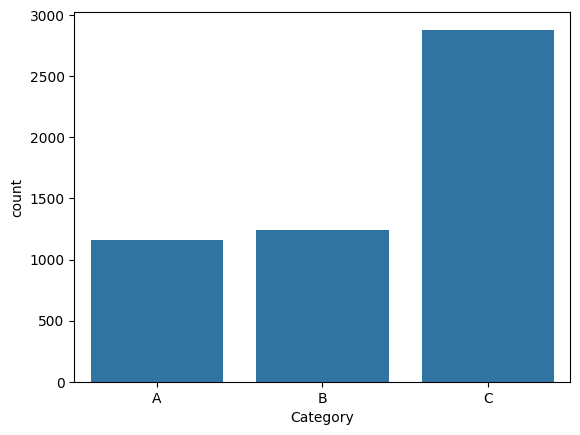

In [143]:
sns.countplot(x='Category',data=a)

<Axes: xlabel='Category', ylabel='total_sales'>

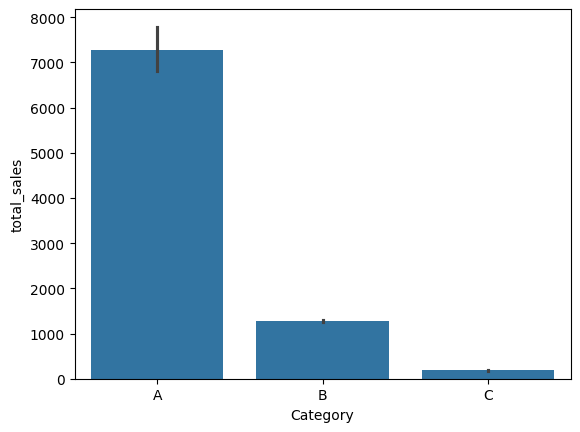

In [144]:
sns.barplot(x='Category',y='total_sales',data=a)

In [145]:
# MULTI-CRITERIA ABC ANALYSIS
b = inv.productmix(grouped['Description'],grouped['total_sales'],grouped['total_revenue'])

In [146]:
b.product_mix.value_counts()

product_mix
C_C    2394
A_A     775
B_B     632
C_B     413
B_C     325
A_B     317
B_A     288
C_A      74
A_C      65
Name: count, dtype: int64

In [147]:
b.columns

Index(['skus', 'sales', 'revenue', 'sales_mix', 'comulative_sales',
       'revenue_mix', 'comulative_revenue', 'sales_category',
       'revenue_category', 'product_mix'],
      dtype='object')

<Axes: xlabel='product_mix', ylabel='sales'>

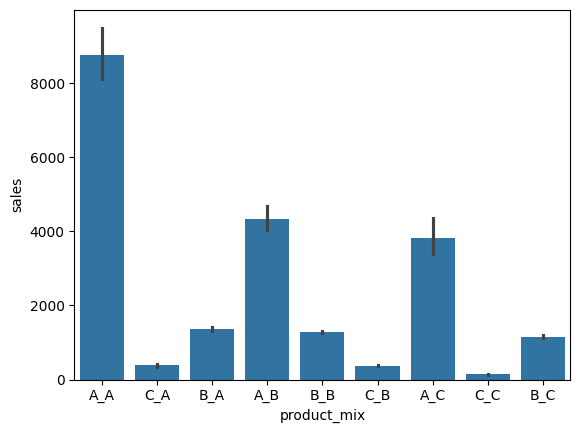

In [149]:
sns.barplot(x='product_mix',y='sales',data=b)

<Axes: xlabel='product_mix', ylabel='revenue'>

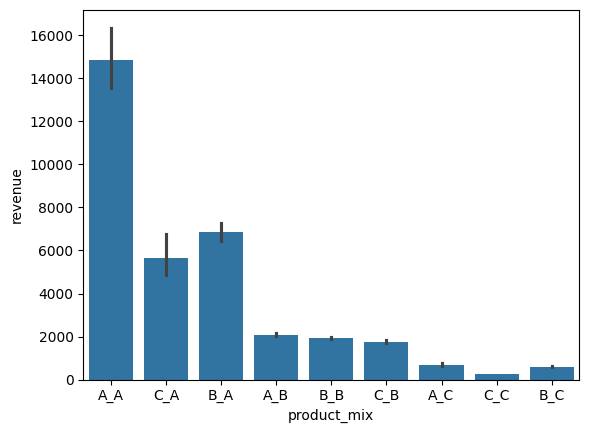

In [150]:
sns.barplot(x='product_mix',y='revenue',data=b)

<Axes: xlabel='product_mix', ylabel='count'>

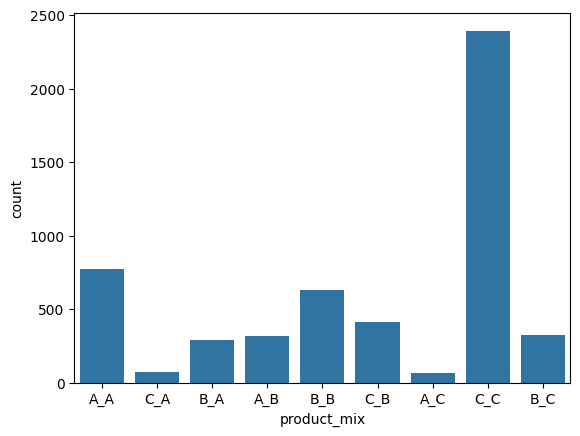

In [151]:
sns.countplot(x='product_mix',data=b)

In [154]:
retail_clean.groupby(['Country','Description']).agg(total_sales = ('Quantity',np.sum),
                                                     total_revenue = ('revenue',np.sum)).reset_index()

C:\Users\Khush Bhuta\AppData\Local\Temp\ipykernel_19808\920199718.py:1: FutureWarning: The provided callable <function sum at 0x000002ABBB10F740> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  retail_clean.groupby(['Country','Description']).agg(total_sales = ('Quantity',np.sum),
C:\Users\Khush Bhuta\AppData\Local\Temp\ipykernel_19808\920199718.py:1: FutureWarning: The provided callable <function sum at 0x000002ABBB10F740> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  retail_clean.groupby(['Country','Description']).agg(total_sales = ('Quantity',np.sum),


,Country,Description,total_sales,total_revenue
0,Australia,DOLLY GIRL BEAKER,200,216.00
1,Australia,I LOVE LONDON MINI BACKPACK,4,16.60
2,Australia,10 COLOUR SPACEBOY PEN,48,40.80
3,Australia,12 PENCIL SMALL TUBE WOODLAND,384,211.20
4,Australia,12 PENCILS SMALL TUBE RED SPOTTY,24,15.60
...,...,...,...,...
29444,West Indies,VINTAGE BEAD PINK SCARF,3,23.85
29445,West Indies,WHITE AND BLUE CERAMIC OIL BURNER,6,7.50
29446,West Indies,WOODLAND PARTY BAG + STICKER SET,1,1.65
29447,West Indies,WOVEN BERRIES CUSHION COVER,2,9.90


In [156]:
# manipulation of data to multicriteria
by_Store = retail_clean.groupby(['Country','Description']).agg(total_sales = ('Quantity',np.sum),
                                                     total_revenue = ('revenue',np.sum)).reset_index()

C:\Users\Khush Bhuta\AppData\Local\Temp\ipykernel_19808\679910350.py:2: FutureWarning: The provided callable <function sum at 0x000002ABBB10F740> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  by_Store = retail_clean.groupby(['Country','Description']).agg(total_sales = ('Quantity',np.sum),
C:\Users\Khush Bhuta\AppData\Local\Temp\ipykernel_19808\679910350.py:2: FutureWarning: The provided callable <function sum at 0x000002ABBB10F740> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  by_Store = retail_clean.groupby(['Country','Description']).agg(total_sales = ('Quantity',np.sum),


In [158]:
mix_country = inv.productmix_storelevel(by_Store['Description'],by_Store['total_sales'],by_Store['total_revenue'],by_Store['Country'])

C:\Users\Khush Bhuta\AppData\Local\Programs\Python\Python312\Lib\site-packages\inventorize3\__init__.py:1102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store['sales_mix']= store['sales']/sum(store['sales'])
C:\Users\Khush Bhuta\AppData\Local\Programs\Python\Python312\Lib\site-packages\inventorize3\__init__.py:1102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store['sales_mix']= store['sales']/sum(store['sales'])
C:\Users\Khush Bhuta\AppData\Local\Programs\Python\Python312\Lib\site-packages\inventorize

In [159]:
mix_country.columns

Index(['sku', 'sales', 'revenue', 'storeofsku', 'sales_mix',
       'comulative_sales', 'revenue_mix', 'comulative_revenue',
       'sales_category', 'revenue_category', 'product_mix'],
      dtype='object')

In [166]:
product_mix = mix_country.groupby(['storeofsku','product_mix']).count().reset_index().iloc[:,0:3]

In [167]:
product_mix[product_mix.storeofsku=='Australia']

,storeofsku,product_mix,sku
0,Australia,A_A,176
1,Australia,A_B,79
2,Australia,A_C,7
3,Australia,B_A,76
4,Australia,B_B,104
5,Australia,B_C,26
6,Australia,C_A,8
7,Australia,C_B,59
8,Australia,C_C,298


In [168]:
# SUPPLIER SEGMENTATION
supplier = pd.read_csv("C:\\Users\\Khush Bhuta\\Desktop\\python_workspace\\data\\supplier_data.csv")
supplier.head()

,supplier,product,availability,no_suppliers,standard,price_fluctuation,Quantity,price
0,supplier1,product_1,0.0,0.5,0.0,0.5,710,360
1,supplier1,product_2,0.0,0.5,0.0,0.5,2997,2740
2,supplier1,product_3,0.0,0.5,0.0,0.5,3917,2919
3,supplier1,product_4,0.0,0.5,0.0,0.5,3827,3246
4,supplier1,product_5,0.0,0.5,0.0,0.0,3882,3596


In [169]:
supplier.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   supplier           24 non-null     object 
 1   product            24 non-null     object 
 2   availability       24 non-null     float64
 3   no_suppliers       24 non-null     float64
 4   standard           24 non-null     float64
 5   price_fluctuation  24 non-null     float64
 6   Quantity           24 non-null     int64  
 7   price              24 non-null     int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 1.6+ KB


In [170]:
supplier

,supplier,product,availability,no_suppliers,standard,price_fluctuation,Quantity,price
0,supplier1,product_1,0.0,0.5,0.0,0.5,710,360
1,supplier1,product_2,0.0,0.5,0.0,0.5,2997,2740
2,supplier1,product_3,0.0,0.5,0.0,0.5,3917,2919
3,supplier1,product_4,0.0,0.5,0.0,0.5,3827,3246
4,supplier1,product_5,0.0,0.5,0.0,0.0,3882,3596
5,supplier1,product_6,0.0,0.5,0.0,0.0,3663,917
6,supplier2,product_7,0.5,0.0,0.5,0.0,3517,2639
7,supplier2,product_8,0.5,0.0,0.5,0.0,450,1384
8,supplier2,product_9,0.5,0.0,0.5,0.0,1438,842
9,supplier2,product_10,0.5,0.0,0.5,0.0,2887,323


In [173]:
supplier['risk_index'] = supplier['availability'] + supplier['no_suppliers'] + supplier['standard'] + supplier['price_fluctuation']
supplier

,supplier,product,availability,no_suppliers,standard,price_fluctuation,Quantity,price,risk_index
0,supplier1,product_1,0.0,0.5,0.0,0.5,710,360,1.0
1,supplier1,product_2,0.0,0.5,0.0,0.5,2997,2740,1.0
2,supplier1,product_3,0.0,0.5,0.0,0.5,3917,2919,1.0
3,supplier1,product_4,0.0,0.5,0.0,0.5,3827,3246,1.0
4,supplier1,product_5,0.0,0.5,0.0,0.0,3882,3596,0.5
5,supplier1,product_6,0.0,0.5,0.0,0.0,3663,917,0.5
6,supplier2,product_7,0.5,0.0,0.5,0.0,3517,2639,1.0
7,supplier2,product_8,0.5,0.0,0.5,0.0,450,1384,1.0
8,supplier2,product_9,0.5,0.0,0.5,0.0,1438,842,1.0
9,supplier2,product_10,0.5,0.0,0.5,0.0,2887,323,1.0


In [174]:
supplier['value'] = supplier['price']*supplier['Quantity']

In [175]:
supplier.head()

,supplier,product,availability,no_suppliers,standard,price_fluctuation,Quantity,price,risk_index,value
0,supplier1,product_1,0.0,0.5,0.0,0.5,710,360,1.0,255600
1,supplier1,product_2,0.0,0.5,0.0,0.5,2997,2740,1.0,8211780
2,supplier1,product_3,0.0,0.5,0.0,0.5,3917,2919,1.0,11433723
3,supplier1,product_4,0.0,0.5,0.0,0.5,3827,3246,1.0,12422442
4,supplier1,product_5,0.0,0.5,0.0,0.0,3882,3596,0.5,13959672


In [176]:
supplier.value.describe()

count    2.400000e+01
mean     5.064812e+06
std      4.847504e+06
min      1.189500e+05
25%      7.975622e+05
50%      3.011452e+06
75%      8.499426e+06
max      1.399081e+07
Name: value, dtype: float64

In [177]:
#VISUALIZING KRAJIC
def category(x,y):
    if((x>=3000000) & (y>=1)):
        return 'strategic'
    elif((x>=3000000) & (y<1)):
        return 'leverage'
    elif((x<3000000) & (y>1)):
        return 'critical'
    else:
        return 'non-critical'

In [179]:
for i in range(supplier.shape[0]):
    supplier.loc[i,'category'] = category(supplier.loc[i,'value'],
                                          supplier.loc[i,'risk_index']) 

In [180]:
supplier.category.value_counts()

category
non-critical    11
strategic        8
leverage         4
critical         1
Name: count, dtype: int64

<Axes: xlabel='risk_index', ylabel='value'>

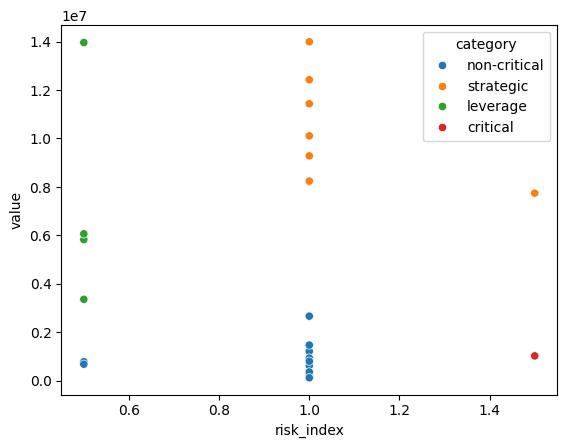

In [183]:
sns.scatterplot(x = 'risk_index', y = 'value'  , data = supplier, hue = 'category')

In [184]:
supplier.head()

,supplier,product,availability,no_suppliers,standard,price_fluctuation,Quantity,price,risk_index,value,category
0,supplier1,product_1,0.0,0.5,0.0,0.5,710,360,1.0,255600,non-critical
1,supplier1,product_2,0.0,0.5,0.0,0.5,2997,2740,1.0,8211780,strategic
2,supplier1,product_3,0.0,0.5,0.0,0.5,3917,2919,1.0,11433723,strategic
3,supplier1,product_4,0.0,0.5,0.0,0.5,3827,3246,1.0,12422442,strategic
4,supplier1,product_5,0.0,0.5,0.0,0.0,3882,3596,0.5,13959672,leverage
